In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn

In [2]:
df = pd.read_csv("../dataset/amazon.csv")

In [3]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:
df.drop(['img_link',	'product_link'], axis=1, inplace=True)

In [5]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."


In [6]:
df.category.describe()

count                                                  1465
unique                                                  211
top       Computers&Accessories|Accessories&Peripherals|...
freq                                                    233
Name: category, dtype: object

In [7]:
df.category

0       Computers&Accessories|Accessories&Peripherals|...
1       Computers&Accessories|Accessories&Peripherals|...
2       Computers&Accessories|Accessories&Peripherals|...
3       Computers&Accessories|Accessories&Peripherals|...
4       Computers&Accessories|Accessories&Peripherals|...
                              ...                        
1460    Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...
1461    Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
1462    Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...
1463    Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...
1464    Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
Name: category, Length: 1465, dtype: object

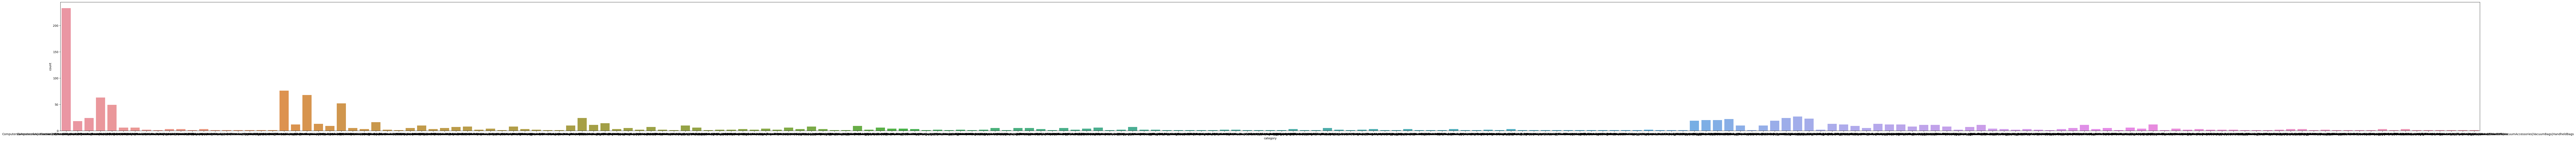

In [8]:
plt.figure(figsize=(150, 8))
sns.countplot(df, x=df.category)
plt.show()

In [9]:
len(pd.unique(df['category']))

211

In [10]:
df['category'].iloc[1]

'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables'

SCORES FOR EACH PRODUCT NEED TO BE CALCULATED BASED ON PUBLIC RATING

In [11]:
df2 = df.iloc[:, :8]

In [12]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count'],
      dtype='object')

In [13]:
df2.drop(['product_name', 'category', 'actual_price'], axis = 1,inplace = True)

C:\Users\sunpr\AppData\Local\Temp\ipykernel_25508\1123752446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['product_name', 'category', 'actual_price'], axis = 1,inplace = True)


In [14]:
df2.columns

Index(['product_id', 'discounted_price', 'discount_percentage', 'rating',
       'rating_count'],
      dtype='object')

In [15]:
len(df2)

1465

In [16]:
df2['product_id'].nunique()

1351

In [17]:
df3 = df2['product_id']

In [18]:
duplicate = df3[df3.duplicated()]
duplicate

369     B07JW9H4J1
377     B098NS6PVG
379     B096MSW6CT
392     B08HDJ86NZ
393     B08CF3B7N1
           ...    
1007    B0B9BXKBC7
1010    B07GVGTSLN
1017    B0B9BD2YL4
1018    B0BMXMLSMM
1019    B0141EZMAI
Name: product_id, Length: 114, dtype: object

KEEP 1st OCCURENCE OF DUPLICATE AND REMOVE THE REMAINING 

In [19]:
df2.head()

,product_id,discounted_price,discount_percentage,rating,rating_count
0,B07JW9H4J1,₹399,64%,4.2,"24,269"
1,B098NS6PVG,₹199,43%,4.0,"43,994"
2,B096MSW6CT,₹199,90%,3.9,"7,928"
3,B08HDJ86NZ,₹329,53%,4.2,"94,363"
4,B08CF3B7N1,₹154,61%,4.2,"16,905"


In [20]:
len(df2)

1465

In [21]:
df2['rating'].nunique()

28

In [22]:
type(df2.iloc[1, -2])

str

CONVERTING STRINGS TO NUMERICAL

In [23]:
df2["discounted_price"] = [(str(i).replace("₹", "")) for i in df2["discounted_price"]]
df2["discounted_price"] = [float(str(i).replace(",", "")) for i in df2["discounted_price"]]

C:\Users\sunpr\AppData\Local\Temp\ipykernel_25508\1696353038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["discounted_price"] = [(str(i).replace("₹", "")) for i in df2["discounted_price"]]
C:\Users\sunpr\AppData\Local\Temp\ipykernel_25508\1696353038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["discounted_price"] = [float(str(i).replace(",", "")) for i in df2["discounted_price"]]


In [24]:
df2["rating_count"] = [float(str(i).replace(",", "")) for i in df2["rating_count"]]

C:\Users\sunpr\AppData\Local\Temp\ipykernel_25508\2722231082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["rating_count"] = [float(str(i).replace(",", "")) for i in df2["rating_count"]]


In [25]:
df2["discount_percentage"] = [float(str(i).replace("%", "")) for i in df2["discount_percentage"]]

C:\Users\sunpr\AppData\Local\Temp\ipykernel_25508\3184751917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["discount_percentage"] = [float(str(i).replace("%", "")) for i in df2["discount_percentage"]]


In [26]:
df2.rating[df2["rating"] == "|"]

1279    |
Name: rating, dtype: object

In [27]:
df2.drop(1279, inplace = True )

C:\Users\sunpr\AppData\Local\Temp\ipykernel_25508\1799270810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(1279, inplace = True )


In [28]:
df2["rating"] = [float(str(i)) for i in df2["rating"]]

C:\Users\sunpr\AppData\Local\Temp\ipykernel_25508\3340441687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["rating"] = [float(str(i)) for i in df2["rating"]]


In [29]:
df2.rating[df2["rating"] == "|"]

Series([], Name: rating, dtype: float64)

In [30]:
df2.head()

,product_id,discounted_price,discount_percentage,rating,rating_count
0,B07JW9H4J1,399.0,64.0,4.2,24269.0
1,B098NS6PVG,199.0,43.0,4.0,43994.0
2,B096MSW6CT,199.0,90.0,3.9,7928.0
3,B08HDJ86NZ,329.0,53.0,4.2,94363.0
4,B08CF3B7N1,154.0,61.0,4.2,16905.0


<Axes: >

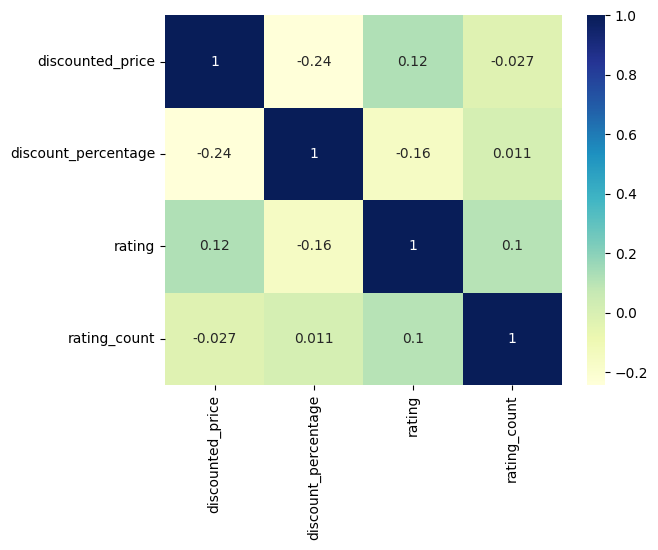

In [31]:
sns.heatmap(df2.iloc[:, 1:].corr(), cmap="YlGnBu", annot=True)

SCALING VALUES

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df2.iloc[:, 1:])

In [34]:
normalized_data = pd.DataFrame(normalized_data, columns = df2.columns[1:])

In [35]:
temp = df2.iloc[:, 0]
temp

0       B07JW9H4J1
1       B098NS6PVG
2       B096MSW6CT
3       B08HDJ86NZ
4       B08CF3B7N1
           ...    
1460    B08L7J3T31
1461    B01M6453MB
1462    B009P2LIL4
1463    B00J5DYCCA
1464    B01486F4G6
Name: product_id, Length: 1464, dtype: object

In [36]:
df3 = pd.concat([temp, normalized_data], axis = 'columns')
df3.head(10)

,product_id,discounted_price,discount_percentage,rating,rating_count
0,B07JW9H4J1,0.004618,0.680851,0.733333,0.056835
1,B098NS6PVG,0.002053,0.457447,0.666667,0.103033
2,B096MSW6CT,0.002053,0.957447,0.633333,0.018563
3,B08HDJ86NZ,0.003720,0.563830,0.733333,0.221001
4,B08CF3B7N1,0.001475,0.648936,0.733333,0.039588
5,B08Y1TFSP6,0.001411,0.904255,0.633333,0.058245
6,B08WRWPM22,0.001766,0.691489,0.700000,0.035567
7,B08DDRGWTJ,0.002437,0.244681,0.766667,0.071220
8,B008IFXQFU,0.005901,0.531915,0.733333,0.420846
9,B082LZGK39,0.002053,0.351064,0.666667,0.103033


In [37]:
def scoreGen(row):
    return float(row['rating']*1250 + row['rating_count']*200 + row['discount_percentage']*200 + row['discounted_price']*500)

In [38]:
df3['publicScore'] = df3.apply (lambda row: scoreGen(row), axis=1)

In [39]:
df3.head(10)

,product_id,discounted_price,discount_percentage,rating,rating_count,publicScore
0,B07JW9H4J1,0.004618,0.680851,0.733333,0.056835,1066.513071
1,B098NS6PVG,0.002053,0.457447,0.666667,0.103033,946.455533
2,B096MSW6CT,0.002053,0.957447,0.633333,0.018563,987.894978
3,B08HDJ86NZ,0.003720,0.563830,0.733333,0.221001,1075.492959
4,B08CF3B7N1,0.001475,0.648936,0.733333,0.039588,1055.109177
5,B08Y1TFSP6,0.001411,0.904255,0.633333,0.058245,984.872337
6,B08WRWPM22,0.001766,0.691489,0.700000,0.035567,1021.294034
7,B08DDRGWTJ,0.002437,0.244681,0.766667,0.071220,1022.732277
8,B008IFXQFU,0.005901,0.531915,0.733333,0.420846,1110.169399
9,B082LZGK39,0.002053,0.351064,0.666667,0.103033,925.178937


PERSONALISED RATING OF PRODUCT BY USER IS ALSO A METRIC

In [40]:
df4 = pd.read_csv("../dataset/positivityReviewScore.csv")
df4.head()

,Unnamed: 0,product_id,product_name,category,discounted_price,discount_percentage,rating,rating_count,about_product,userID,userName,reviewID,reviewTitle,positvity
0,0,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,AGV3IEFANZCKECFGUM42MRH5FNOA,Azhar JuMan,R1LW6NWSVTVZ2H,Works on linux for me. Get the model with ante...,0.5094
1,1,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,AEBO7NWCNXKT4AESAN443HQH35FQ,Anirudh Sood,R3VR5WFKUS15C5,Does what it say but other brands available at...,0.0515
2,2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,AE7GD3VRRYQEAHDR7FXJIR23INYA,Hari Krishnan PS,R2F6GC79OYWUKQ,Easy Handle,0.4096
3,3,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,AHPAW24BI5X2GCX5M2LHI72VSJJQ,Akash Jindal,R3QZ19MECGWG9A,Great product,0.9309
4,4,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,AE2VXY4CFO36MDSIMPG43XHNF4GA,PRADEEP,R2MPU42MYK7GPO,Perfect working,0.7566


In [41]:
df4.columns

Index(['Unnamed: 0', 'product_id', 'product_name', 'category',
       'discounted_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'userID', 'userName', 'reviewID', 'reviewTitle',
       'positvity'],
      dtype='object')

In [42]:
df4.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [43]:
df4.head()

,product_id,product_name,category,discounted_price,discount_percentage,rating,rating_count,about_product,userID,userName,reviewID,reviewTitle,positvity
0,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,AGV3IEFANZCKECFGUM42MRH5FNOA,Azhar JuMan,R1LW6NWSVTVZ2H,Works on linux for me. Get the model with ante...,0.5094
1,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,AEBO7NWCNXKT4AESAN443HQH35FQ,Anirudh Sood,R3VR5WFKUS15C5,Does what it say but other brands available at...,0.0515
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,AE7GD3VRRYQEAHDR7FXJIR23INYA,Hari Krishnan PS,R2F6GC79OYWUKQ,Easy Handle,0.4096
3,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,AHPAW24BI5X2GCX5M2LHI72VSJJQ,Akash Jindal,R3QZ19MECGWG9A,Great product,0.9309
4,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,AE2VXY4CFO36MDSIMPG43XHNF4GA,PRADEEP,R2MPU42MYK7GPO,Perfect working,0.7566


JOINING DF3 & DF4

In [44]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9869 entries, 0 to 9868
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           9869 non-null   object 
 1   product_name         9869 non-null   object 
 2   category             9869 non-null   object 
 3   discounted_price     9869 non-null   object 
 4   discount_percentage  9869 non-null   object 
 5   rating               9869 non-null   object 
 6   rating_count         9867 non-null   object 
 7   about_product        9869 non-null   object 
 8   userID               9869 non-null   object 
 9   userName             9868 non-null   object 
 10  reviewID             9869 non-null   object 
 11  reviewTitle          9859 non-null   object 
 12  positvity            9869 non-null   float64
dtypes: float64(1), object(12)
memory usage: 1002.4+ KB


In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1465 entries, 0 to 1279
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1464 non-null   object 
 1   discounted_price     1464 non-null   float64
 2   discount_percentage  1464 non-null   float64
 3   rating               1464 non-null   float64
 4   rating_count         1462 non-null   float64
 5   publicScore          1462 non-null   float64
dtypes: float64(5), object(1)
memory usage: 80.1+ KB


In [46]:
df5 = pd.merge(df4, df3, how ='left', on ='product_id')

In [47]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9869 entries, 0 to 9868
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             9869 non-null   object 
 1   product_name           9869 non-null   object 
 2   category               9869 non-null   object 
 3   discounted_price_x     9869 non-null   object 
 4   discount_percentage_x  9869 non-null   object 
 5   rating_x               9869 non-null   object 
 6   rating_count_x         9867 non-null   object 
 7   about_product          9869 non-null   object 
 8   userID                 9869 non-null   object 
 9   userName               9868 non-null   object 
 10  reviewID               9869 non-null   object 
 11  reviewTitle            9859 non-null   object 
 12  positvity              9869 non-null   float64
 13  discounted_price_y     9853 non-null   float64
 14  discount_percentage_y  9853 non-null   float64
 15  rati

In [48]:
df5.head()

,product_id,product_name,category,discounted_price_x,discount_percentage_x,rating_x,rating_count_x,about_product,userID,userName,reviewID,reviewTitle,positvity,discounted_price_y,discount_percentage_y,rating_y,rating_count_y,publicScore
0,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,AGV3IEFANZCKECFGUM42MRH5FNOA,Azhar JuMan,R1LW6NWSVTVZ2H,Works on linux for me. Get the model with ante...,0.5094,0.009108,0.468085,0.733333,0.420848,1099.007482
1,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,AEBO7NWCNXKT4AESAN443HQH35FQ,Anirudh Sood,R3VR5WFKUS15C5,Does what it say but other brands available at...,0.0515,0.009108,0.468085,0.733333,0.420848,1099.007482
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,AE7GD3VRRYQEAHDR7FXJIR23INYA,Hari Krishnan PS,R2F6GC79OYWUKQ,Easy Handle,0.4096,0.009108,0.468085,0.733333,0.420848,1099.007482
3,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,AHPAW24BI5X2GCX5M2LHI72VSJJQ,Akash Jindal,R3QZ19MECGWG9A,Great product,0.9309,0.009108,0.468085,0.733333,0.420848,1099.007482
4,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,AE2VXY4CFO36MDSIMPG43XHNF4GA,PRADEEP,R2MPU42MYK7GPO,Perfect working,0.7566,0.009108,0.468085,0.733333,0.420848,1099.007482


In [49]:
df5 = df5.dropna()

DROPPING UNWANTED COLUMNS

In [50]:
#needed productid  product name   userid    username   positivity     publicScore
df6 = df5.drop(['discounted_price_x', 'discount_percentage_x', 'rating_x', 'rating_count_x', 'about_product', 'reviewID', 'discounted_price_y', 'discount_percentage_y', 'rating_y', 'rating_count_y'], axis = 1)
df6.head()

,product_id,product_name,category,userID,userName,reviewTitle,positvity,publicScore
0,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,AGV3IEFANZCKECFGUM42MRH5FNOA,Azhar JuMan,Works on linux for me. Get the model with ante...,0.5094,1099.007482
1,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,AEBO7NWCNXKT4AESAN443HQH35FQ,Anirudh Sood,Does what it say but other brands available at...,0.0515,1099.007482
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,AE7GD3VRRYQEAHDR7FXJIR23INYA,Hari Krishnan PS,Easy Handle,0.4096,1099.007482
3,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,AHPAW24BI5X2GCX5M2LHI72VSJJQ,Akash Jindal,Great product,0.9309,1099.007482
4,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,AE2VXY4CFO36MDSIMPG43XHNF4GA,PRADEEP,Perfect working,0.7566,1099.007482


In [51]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9840 entries, 0 to 9868
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    9840 non-null   object 
 1   product_name  9840 non-null   object 
 2   category      9840 non-null   object 
 3   userID        9840 non-null   object 
 4   userName      9840 non-null   object 
 5   reviewTitle   9840 non-null   object 
 6   positvity     9840 non-null   float64
 7   publicScore   9840 non-null   float64
dtypes: float64(2), object(6)
memory usage: 691.9+ KB


In [52]:
df6 = df6.dropna()

In [53]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9840 entries, 0 to 9868
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    9840 non-null   object 
 1   product_name  9840 non-null   object 
 2   category      9840 non-null   object 
 3   userID        9840 non-null   object 
 4   userName      9840 non-null   object 
 5   reviewTitle   9840 non-null   object 
 6   positvity     9840 non-null   float64
 7   publicScore   9840 non-null   float64
dtypes: float64(2), object(6)
memory usage: 691.9+ KB


In [54]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df6.iloc[:, 7:])
normalized_data = pd.DataFrame(normalized_data, columns = df6.columns[7:])

In [55]:
normalized_data

,publicScore
0,0.613708
1,0.613708
2,0.613708
3,0.613708
4,0.613708
...,...
9835,0.714769
9836,0.714769
9837,0.713892
9838,0.713892


In [56]:
df6['publicScore'] = normalized_data

In [57]:
df6.head()

,product_id,product_name,category,userID,userName,reviewTitle,positvity,publicScore
0,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,AGV3IEFANZCKECFGUM42MRH5FNOA,Azhar JuMan,Works on linux for me. Get the model with ante...,0.5094,0.613708
1,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,AEBO7NWCNXKT4AESAN443HQH35FQ,Anirudh Sood,Does what it say but other brands available at...,0.0515,0.613708
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,AE7GD3VRRYQEAHDR7FXJIR23INYA,Hari Krishnan PS,Easy Handle,0.4096,0.613708
3,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,AHPAW24BI5X2GCX5M2LHI72VSJJQ,Akash Jindal,Great product,0.9309,0.613708
4,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,AE2VXY4CFO36MDSIMPG43XHNF4GA,PRADEEP,Perfect working,0.7566,0.613708


In [58]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9840 entries, 0 to 9868
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    9840 non-null   object 
 1   product_name  9840 non-null   object 
 2   category      9840 non-null   object 
 3   userID        9840 non-null   object 
 4   userName      9840 non-null   object 
 5   reviewTitle   9840 non-null   object 
 6   positvity     9840 non-null   float64
 7   publicScore   9812 non-null   float64
dtypes: float64(2), object(6)
memory usage: 691.9+ KB


In [59]:
# df6.to_csv('scoresPublicPersonal.csv', header=False, index=False)

CATEGORY TOP PRODUCTS    BASED ON JUST PUBLIC SCORES

In [60]:
# df7 = df5.drop(['discounted_price_x', 'discount_percentage_x', 'rating_x', 'rating_count_x', 'about_product', 'reviewID', 'discounted_price_y', 'discount_percentage_y', 'rating_y', 'rating_count_y', 'userID', 'userName', 'reviewTitle', 'positvity'], axis = 1)
# df7.head()

In [61]:
# df7['publicScore'].nunique()

In [62]:
# df7 = df7.dropna()
# df7.info()

In [63]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df6['product_id']= label_encoder.fit_transform(df6['product_id'])
df6['userID']= label_encoder.fit_transform(df6['userID'])


In [64]:
df6.head(10)

,product_id,product_name,category,userID,userName,reviewTitle,positvity,publicScore
0,0,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,6183,Azhar JuMan,Works on linux for me. Get the model with ante...,0.5094,0.613708
1,0,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,504,Anirudh Sood,Does what it say but other brands available at...,0.0515,0.613708
2,0,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,362,Hari Krishnan PS,Easy Handle,0.4096,0.613708
3,0,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,7928,Akash Jindal,Great product,0.9309,0.613708
4,0,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,48,PRADEEP,Perfect working,0.7566,0.613708
5,0,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,7426,Rajesh,Speed is perfect,0.8408,0.613708
6,0,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,3411,Divya Kothari,Great Design,0.8473,0.613708
7,0,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,7879,abhijit,Build,0.3033,0.613708
8,1,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,4375,T N Sivaji,Works Good,0.8939,0.562149
9,1,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,5353,Akku,Perfect replacement cell for trimmer,0.6607,0.562149


In [65]:
# df6.to_csv('scoresPublicPersonalEncoded.csv', header=False, index=False)

In [66]:

ratings_df = pd.pivot_table(df6, index='userID', columns='product_id', values = 'positvity')
ratings_df.head()
     

product_id,0,1,2,3,4,5,6,7,8,9,...,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254
userID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
def get_other_movies(product_name):
  #get all users who bought a specific product
  df_movie_users_series = df6.loc[df6['product_name']==product_name]['userID']
  df_movie_users = pd.DataFrame(df_movie_users_series,columns=['userID'])
  other_movies = pd.merge(df_movie_users,df6,on='userID')
  other_users_watched = pd.DataFrame(other_movies.groupby('product_name')['userID'].count()).sort_values('userID',ascending=False)
  other_users_watched['perc_who_watched'] = round(other_users_watched['userID']*100/other_users_watched['userID'][0],1)
  return other_users_watched[:10]
     


In [68]:
get_other_movies('Philips GC1905 1440-Watt Steam Iron with Spray (Blue)')

,userID,perc_who_watched
product_name,,
Philips GC1905 1440-Watt Steam Iron with Spray (Blue),8,100.0
"AmazonBasics Micro USB Fast Charging Cable for Android Phones with Gold Plated Connectors (3 Feet, Black)",1,12.5
Philips PowerPro FC9352/01 Compact Bagless Vacuum Cleaner (Blue),1,12.5
SanDisk Ultra Dual 64 GB USB 3.0 OTG Pen Drive (Black),1,12.5
Sennheiser CX 80S in-Ear Wired Headphones with in-line One-Button Smart Remote with Microphone Black,1,12.5
"Western Digital WD 2TB My Passport Portable Hard Disk Drive, USB 3.0 with Automatic Backup, 256 Bit AES Hardware Encryption,Password Protection,Compatible with Windows and Mac, External HDD-Black",1,12.5


<h1>YAY PUBLIC SCORES AND PERSONAL REVIEW BASED SCORES ARE READY</h1>

CORELLATION BETWEEN USERS IS NEEDED FOR COLLABORATIVE FILTERING

In [69]:
product_wide = ratings_df.fillna(0.0)
product_wide.head()
     
     

product_id,0,1,2,3,4,5,6,7,8,9,...,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254
userID,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
product_wide.to_csv('ratingsMatrix.csv', header=False, index=False)

TRYING Nearest Neighbour

In [71]:
from sklearn.neighbors import NearestNeighbors
     

In [72]:
model_knn = NearestNeighbors(metric='cosine',algorithm='brute', n_neighbors=5)
model_knn.fit(product_wide)

NearestNeighbors(algorithm='brute', metric='cosine')

In [73]:
#Gets the top 10 nearest neighbours of the product
def print_similar_product(movieid) :
  query_index_movie_ratings = product_wide.loc[movieid,:].values.reshape(1,-1)
  distances,indices = model_knn.kneighbors(query_index_movie_ratings,n_neighbors = 3) 
  for i in range(0,len(distances.flatten())):
    get_movie = df6.loc[df6['product_id']==movieid]['product_name']
    if i==0:
      print('Recommendations for {0}:\n'.format(get_movie))
    else :
      indices_flat = indices.flatten()[i]
      get_movie = df6.loc[df6['product_id']==product_wide.iloc[indices_flat,:].name]['product_name']
      print('{0}: {1}:'.format(i,get_movie))

In [74]:
print_similar_product(159)

Recommendations for 1279    SanDisk Ultra 64 GB USB Pen Drives (SDDDC2-064...
1280    SanDisk Ultra 64 GB USB Pen Drives (SDDDC2-064...
1281    SanDisk Ultra 64 GB USB Pen Drives (SDDDC2-064...
1282    SanDisk Ultra 64 GB USB Pen Drives (SDDDC2-064...
1283    SanDisk Ultra 64 GB USB Pen Drives (SDDDC2-064...
1284    SanDisk Ultra 64 GB USB Pen Drives (SDDDC2-064...
1285    SanDisk Ultra 64 GB USB Pen Drives (SDDDC2-064...
1286    SanDisk Ultra 64 GB USB Pen Drives (SDDDC2-064...
Name: product_name, dtype: object:

1: 1279    SanDisk Ultra 64 GB USB Pen Drives (SDDDC2-064...
1280    SanDisk Ultra 64 GB USB Pen Drives (SDDDC2-064...
1281    SanDisk Ultra 64 GB USB Pen Drives (SDDDC2-064...
1282    SanDisk Ultra 64 GB USB Pen Drives (SDDDC2-064...
1283    SanDisk Ultra 64 GB USB Pen Drives (SDDDC2-064...
1284    SanDisk Ultra 64 GB USB Pen Drives (SDDDC2-064...
1285    SanDisk Ultra 64 GB USB Pen Drives (SDDDC2-064...
1286    SanDisk Ultra 64 GB USB Pen Drives (SDDDC2-064...
Name: product

User-based Collaborative Filtering

In [75]:
user_conf_matrix = ratings_df.copy()

# We will fill the row wise NaN's with the corresponding user's mean ratings, so that we can carry out Pearson correlation.
# Here we assume avg ratings for the movie that is not rated.
user_conf_matrix = user_conf_matrix.apply(lambda row: row.fillna(row.mean()), axis=1)
user_conf_matrix.head(5)

product_id,0,1,2,3,4,5,6,7,8,9,...,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254
userID,,,,,,,,,,,,,,,,,,,,,
0,0.3247,0.3247,0.3247,0.3247,0.3247,0.3247,0.3247,0.3247,0.3247,0.3247,...,0.3247,0.3247,0.3247,0.3247,0.3247,0.3247,0.3247,0.3247,0.3247,0.3247
1,0.2320,0.2320,0.2320,0.2320,0.2320,0.2320,0.2320,0.2320,0.2320,0.2320,...,0.2320,0.2320,0.2320,0.2320,0.2320,0.2320,0.2320,0.2320,0.2320,0.2320
2,0.7929,0.7929,0.7929,0.7929,0.7929,0.7929,0.7929,0.7929,0.7929,0.7929,...,0.7929,0.7929,0.7929,0.7929,0.7929,0.7929,0.7929,0.7929,0.7929,0.7929
3,0.8520,0.8520,0.8520,0.8520,0.8520,0.8520,0.8520,0.8520,0.8520,0.8520,...,0.8520,0.8520,0.8520,0.8520,0.8520,0.8520,0.8520,0.8520,0.8520,0.8520
4,0.0710,0.0710,0.0710,0.0710,0.0710,0.0710,0.0710,0.0710,0.0710,0.0710,...,0.0710,0.0710,0.0710,0.0710,0.0710,0.0710,0.0710,0.0710,0.0710,0.0710


In [87]:
transposeUser = user_conf_matrix.T

In [91]:
transposeUser

userID,0,1,2,3,4,5,6,7,8,9,...,8605,8606,8607,8608,8609,8610,8611,8612,8613,8614
product_id,,,,,,,,,,,,,,,,,,,,,
0,0.3247,0.232,0.7929,0.852,0.071,0.0306,0.9048,0.8933,0.3831,0.6407,...,0.0525,0.0727,0.1107,0.7777,0.6098,0.8411,0.0305,0.9561,0.9483,0.8872
1,0.3247,0.232,0.7929,0.852,0.071,0.0306,0.9048,0.8933,0.3831,0.6407,...,0.0525,0.0727,0.1107,0.7777,0.6098,0.8411,0.0305,0.9561,0.9483,0.8872
2,0.3247,0.232,0.7929,0.852,0.071,0.0306,0.9048,0.8933,0.3831,0.6407,...,0.0525,0.0727,0.1107,0.7777,0.6098,0.8411,0.0305,0.9561,0.9483,0.8872
3,0.3247,0.232,0.7929,0.852,0.071,0.0306,0.9048,0.8933,0.3831,0.6407,...,0.0525,0.0727,0.1107,0.7777,0.6098,0.8411,0.0305,0.9561,0.9483,0.8872
4,0.3247,0.232,0.7929,0.852,0.071,0.0306,0.9048,0.8933,0.3831,0.6407,...,0.0525,0.0727,0.1107,0.7777,0.6098,0.8411,0.0305,0.9561,0.9483,0.8872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,0.3247,0.232,0.7929,0.852,0.071,0.0306,0.9048,0.8933,0.3831,0.6407,...,0.0525,0.0727,0.1107,0.7777,0.6098,0.8411,0.0305,0.9561,0.9483,0.8872
1251,0.3247,0.232,0.7929,0.852,0.071,0.0306,0.9048,0.8933,0.3831,0.6407,...,0.0525,0.0727,0.1107,0.7777,0.6098,0.8411,0.0305,0.9561,0.9483,0.8872
1252,0.3247,0.232,0.7929,0.852,0.071,0.0306,0.9048,0.8933,0.3831,0.6407,...,0.0525,0.0727,0.1107,0.7777,0.6098,0.8411,0.0305,0.9561,0.9483,0.8872


In [88]:
user_corr_mat = transposeUser.corr()

In [89]:
user_corr_mat

userID,0,1,2,3,4,5,6,7,8,9,...,8605,8606,8607,8608,8609,8610,8611,8612,8613,8614
userID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
user_corr_mat.isnull().sum()

userID
0       8615
1       8615
2       8615
3       8615
4       8615
        ... 
8610    8615
8611    8615
8612    8615
8613    8615
8614    8615
Length: 8615, dtype: int64

In [76]:
corrOfuser20 = user_corr_mat.iloc[33]
corrOfuser20.sort_values(ascending=False, inplace=True)
corrOfuser20.dropna(inplace = True)
top50_corr_users = corrOfuser20[1:51]

mylist = []
for i in range(100):
  if df6[ (df6['userID'] == 20) & (df6['product_id'] == i) ].empty:
    mylist.append(i)
  else:
    pass

print('{}nd Movie : '.format(mylist[3]), df6['product_name'][ df6['product_id'] == mylist[3] ].values)

top50_users = top50_corr_users.keys()

count = 0
users = list()
for user in top50_users:
  if df6[ (df6['userID'] == user) & (df6['product_id'] == mylist[3]) ]['positvity'].sum()  :
    count +=1
    users.append(user)

3nd Movie :  ['Logitech M235 Wireless Mouse, 1000 DPI Optical Tracking, 12 Month Life Battery, Compatible with Windows, Mac, Chromebook/PC/Laptop'
 'Logitech M235 Wireless Mouse, 1000 DPI Optical Tracking, 12 Month Life Battery, Compatible with Windows, Mac, Chromebook/PC/Laptop'
 'Logitech M235 Wireless Mouse, 1000 DPI Optical Tracking, 12 Month Life Battery, Compatible with Windows, Mac, Chromebook/PC/Laptop'
 'Logitech M235 Wireless Mouse, 1000 DPI Optical Tracking, 12 Month Life Battery, Compatible with Windows, Mac, Chromebook/PC/Laptop'
 'Logitech M235 Wireless Mouse, 1000 DPI Optical Tracking, 12 Month Life Battery, Compatible with Windows, Mac, Chromebook/PC/Laptop'
 'Logitech M235 Wireless Mouse, 1000 DPI Optical Tracking, 12 Month Life Battery, Compatible with Windows, Mac, Chromebook/PC/Laptop'
 'Logitech M235 Wireless Mouse, 1000 DPI Optical Tracking, 12 Month Life Battery, Compatible with Windows, Mac, Chromebook/PC/Laptop'
 'Logitech M235 Wireless Mouse, 1000 DPI Optical 

In [78]:

def predict_rating():
  sum_similarity = 0
  weighted_ratings = 0
  for user in users:
    weighted_ratings += top50_corr_users.ix[user] * df6[ (df6['userID'] == user) & 
                                                          (df6['product_id'] == mylist[3]) ]['positvity'].sum()
    sum_similarity += top50_corr_users.ix[user]
  if sum_similarity == 0:
    sum_similarity = 1
  return weighted_ratings / sum_similarity

print('the predicted rate for this movie by user 1 is: ',predict_rating())    
print("----------------------------------------------------------") 

the predicted rate for this movie by user 1 is:  0.0
----------------------------------------------------------


In [92]:
df6.head()

,product_id,product_name,category,userID,userName,reviewTitle,positvity,publicScore
0,0,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,6183,Azhar JuMan,Works on linux for me. Get the model with ante...,0.5094,0.613708
1,0,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,504,Anirudh Sood,Does what it say but other brands available at...,0.0515,0.613708
2,0,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,362,Hari Krishnan PS,Easy Handle,0.4096,0.613708
3,0,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,7928,Akash Jindal,Great product,0.9309,0.613708
4,0,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,48,PRADEEP,Perfect working,0.7566,0.613708


In [184]:
var = 'Health&PersonalCare'
var

'Health&PersonalCare'

In [185]:
uni = {}
for val in df6['product_name'][df6['category'] == var]:
    uni[val] = True
uni

{'Dr Trust Electronic Kitchen Digital Scale Weighing Machine (Blue)': True}

In [183]:
len(uni)

31

In [138]:
uni

{'Panasonic CR-2032/5BE Lithium Coin Battery - Pack of 5': True,
 'Panasonic Eneloop BQ-CC55N Advanced, Smart and Quick Charger for AA & AAA Rechargeable Batteries, White': True,
 'Duracell CR2016 3V Lithium Coin Battery, 5 pcs, 2016 Coin Button Cell Battery, DL2016': True,
 'Duracell CR2025 3V Lithium Coin Battery, 5 pcs, 2025 Coin Button Cell Battery, DL2025': True}

LETS SEE WHAT DOES USER 6183 PURCHASED

In [151]:
var2 = df6['userID'].iloc[55]
uniqueProdBoughtByVar2 = {}
for val in df6['product_name'][df6['userID'] == var2]:
    uniqueProdBoughtByVar2[val] = True

In [152]:
uniqueProdBoughtByVar2

{'BlueRigger Digital Optical Audio Toslink Cable (3.3 Feet / 1 Meter) With 8 Channel (7.1) Audio Support (for Home Theatre, Xbox, Playstation etc.)': True,
 'BlueRigger Digital Optical Audio Toslink Cable (6 Feet / 1.8 Meter) With 8 Channel (7.1) Audio Support (for Home Theatre, Xbox, Playstation etc.)': True,
 'Mi Air Purifier 3 with True HEPA Filter, removes air pollutants, smoke, odor, bacteria & viruses with 99.97% efficiency, coverage area up to 484 sq. ft., Wi-Fi & Voice control - Alexa/GA (white)': True,
 'Havells OFR 13 Wave Fin with PTC Fan Heater 2900 Watts (Black)': True}

In [154]:
Broad_category = {}
for val in df6['category'].unique():
    tokens = val.split('|')
    if (tokens[0] in Broad_category):
        Broad_category[tokens[0]] += 1
    else:
        Broad_category[tokens[0]] = 1
Broad_category

{'Computers&Accessories': 57,
 'Electronics': 61,
 'Home&Kitchen': 72,
 'OfficeProducts': 14,
 'Toys&Games': 1,
 'MusicalInstruments': 1,
 'Health&PersonalCare': 1,
 'HomeImprovement': 2,
 'Car&Motorbike': 1}

In [160]:
df6.dropna(inplace = True)

In [161]:
Broad_category = {}
for val in df6['category'].unique():
    tokens = val.split('|')
    if (tokens[0] in Broad_category):
        Broad_category[tokens[0]] += 1
    else:
        Broad_category[tokens[0]] = 1
Broad_category

{'Computers&Accessories': 57,
 'Electronics': 61,
 'Home&Kitchen': 72,
 'OfficeProducts': 14,
 'Toys&Games': 1,
 'MusicalInstruments': 1,
 'Health&PersonalCare': 1,
 'HomeImprovement': 2,
 'Car&Motorbike': 1}

In [165]:
def convertCotegory(row):
    val = row['category']
    token = val.split('|')
    return token[0]

df6['broadCategory']= df6.apply(lambda row: convertCotegory(row), axis=1)

In [167]:
df6.drop(['category'], axis = 'columns', inplace = True)

In [170]:
df6.columns

Index(['product_id', 'product_name', 'userID', 'userName', 'reviewTitle',
       'positvity', 'publicScore', 'category'],
      dtype='object')

In [169]:
df6.rename(columns = {'broadCategory':'category'}, inplace = True)

In [189]:
var2 = 6183
uniqueProdBoughtByVar2 = {}
for val in df6['product_name'][df6['userID'] == var2]:
    uniqueProdBoughtByVar2[val] = True
uniqueProdBoughtByVar2

{'TP-Link Nano USB WiFi Dongle 150Mbps High Gain Wireless Network Wi-Fi Adapter for PC Desktop and Laptops, Supports Windows 10/8.1/8/7/XP, Linux, Mac OS X (TL-WN722N)': True,
 'TP-LINK WiFi Dongle 300 Mbps Mini Wireless Network USB Wi-Fi Adapter for PC Desktop Laptop(Supports Windows 11/10/8.1/8/7/XP, Mac OS 10.9-10.15 and Linux, WPS, Soft AP Mode, USB 2.0) (TL-WN823N),Black': True,
 'TP-Link USB WiFi Adapter for PC(TL-WN725N), N150 Wireless Network Adapter for Desktop - Nano Size WiFi Dongle Compatible with Windows 11/10/7/8/8.1/XP/ Mac OS 10.9-10.15 Linux Kernel 2.6.18-4.4.3': True}

In [191]:
df6[df6['userID'] == var2]

,product_id,product_name,userID,userName,reviewTitle,positvity,publicScore,category
0,0,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,6183,Azhar JuMan,Works on linux for me. Get the model with ante...,0.5094,0.613708,Computers&Accessories
96,12,TP-LINK WiFi Dongle 300 Mbps Mini Wireless Net...,6183,Azhar JuMan,Works on linux for me. Get the model with ante...,0.5094,0.626515,Computers&Accessories
104,13,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",6183,Azhar JuMan,Works on linux for me. Get the model with ante...,0.5094,0.620636,Computers&Accessories


In [192]:
df6[df6['product_id'] == 0]

,product_id,product_name,userID,userName,reviewTitle,positvity,publicScore,category
0,0,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,6183,Azhar JuMan,Works on linux for me. Get the model with ante...,0.5094,0.613708,Computers&Accessories
1,0,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,504,Anirudh Sood,Does what it say but other brands available at...,0.0515,0.613708,Computers&Accessories
2,0,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,362,Hari Krishnan PS,Easy Handle,0.4096,0.613708,Computers&Accessories
3,0,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,7928,Akash Jindal,Great product,0.9309,0.613708,Computers&Accessories
4,0,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,48,PRADEEP,Perfect working,0.7566,0.613708,Computers&Accessories
5,0,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,7426,Rajesh,Speed is perfect,0.8408,0.613708,Computers&Accessories
6,0,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,3411,Divya Kothari,Great Design,0.8473,0.613708,Computers&Accessories
7,0,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,7879,abhijit,Build,0.3033,0.613708,Computers&Accessories


In [ ]:
df6.to_csv('shortCategories.csv', header=False, index=False)

In [193]:
ratings_df = pd.pivot_table(df6, index='userID', columns='product_id', values = 'positvity')
ratings_df.head()

product_id,0,1,2,3,4,5,6,7,8,9,...,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250
userID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
ratings_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8587 entries, 0 to 8614
Columns: 1251 entries, 0 to 1250
dtypes: float64(1251)
memory usage: 82.0 MB


In [194]:
ratings_df.isnull().sum()

product_id
0       8579
1       8579
2       8579
3       8579
4       8579
        ... 
1246    8579
1247    8582
1248    8580
1249    8579
1250    8586
Length: 1251, dtype: int64

In [198]:
user_corr_mat = user_conf_matrix.T.corr()
user_corr_mat

userID,0,1,2,3,4,5,6,7,8,9,...,8605,8606,8607,8608,8609,8610,8611,8612,8613,8614
userID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
user_corr_mat.isnull().sum()

userID
0       8587
1       8587
2       8587
3       8587
4       8587
        ... 
8610    8587
8611    8587
8612    8587
8613    8587
8614    8587
Length: 8587, dtype: int64